In [1]:
import matplotlib.pyplot as plt
import ds_functions as ds
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import config as cfg
import numpy as np
from matplotlib.ticker import MultipleLocator, FuncFormatter

register_matplotlib_converters()

# Heart Failure Dataset

In [2]:
data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

## Dimensionality

In [3]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


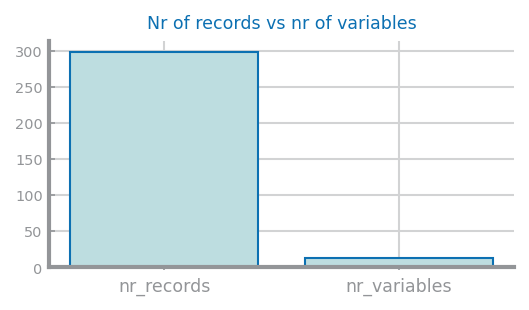

In [4]:
plt.figure(figsize=(4,2))
values = { 'nr_records': data.shape[0], 'nr_variables': data.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr of variables')

In [5]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
data['sex'] = data['sex'].astype('category')
data['sex'] = data['sex'].map({0: 'female', 1: 'male'})
for c in ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']:
    data[c] = data[c].astype('bool')

data.dtypes

age                          float64
anaemia                         bool
creatinine_phosphokinase       int64
diabetes                        bool
ejection_fraction              int64
high_blood_pressure             bool
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                         category
smoking                         bool
time                           int64
DEATH_EVENT                     bool
dtype: object

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<Figure size 600x450 with 0 Axes>

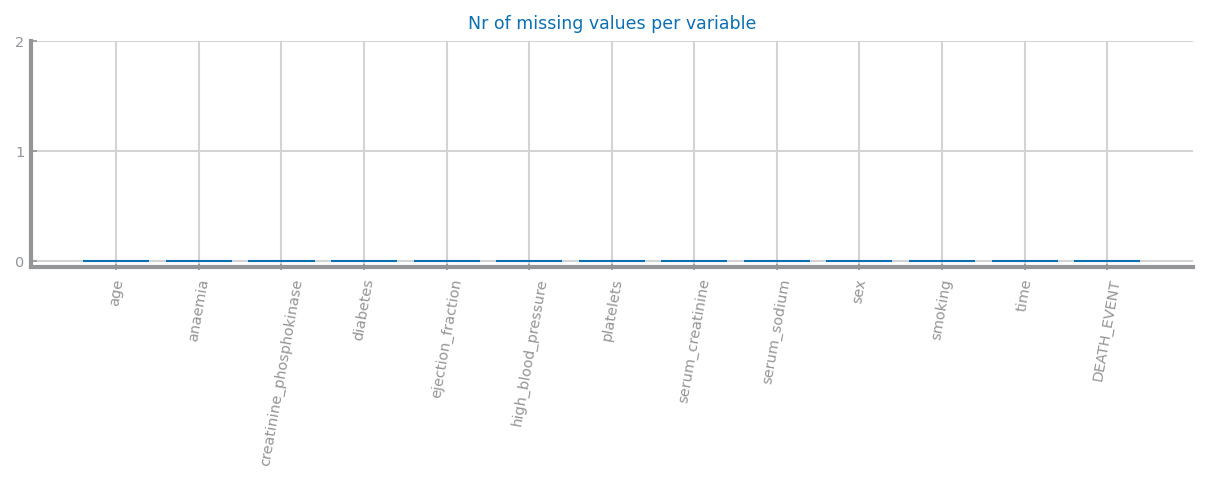

In [7]:
plt.figure()
mv = {var: data[var].isna().sum() for var in data}
plt.figure(figsize=(10, 2))
plt.bar(mv.keys(), mv.values(), edgecolor=cfg.LINE_COLOR, color=cfg.FILL_COLOR)
plt.title('Nr of missing values per variable')
plt.yticks([0, 1, 2])
plt.xticks(rotation=80)

mv.values()

## Granularity

In [8]:
values = {'nr records': data.shape[0], 'nr variables': data.shape[1]}
data.describe(include=['bool','category','float64','int64'])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299,299.000000,299,299.000000,299,299.000000,299.00000,299.000000,299,299,299.000000,299
unique,NaN,2,NaN,2,NaN,2,NaN,NaN,NaN,2,2,NaN,2
top,NaN,False,NaN,False,NaN,False,NaN,NaN,NaN,male,False,NaN,False
freq,NaN,170,NaN,174,NaN,194,NaN,NaN,NaN,194,203,NaN,203
mean,60.833893,NaN,581.839465,NaN,38.083612,NaN,263358.029264,1.39388,136.625418,NaN,NaN,130.260870,NaN
std,11.894809,NaN,970.287881,NaN,11.834841,NaN,97804.236869,1.03451,4.412477,NaN,NaN,77.614208,NaN
min,40.000000,NaN,23.000000,NaN,14.000000,NaN,25100.000000,0.50000,113.000000,NaN,NaN,4.000000,NaN
25%,51.000000,NaN,116.500000,NaN,30.000000,NaN,212500.000000,0.90000,134.000000,NaN,NaN,73.000000,NaN
50%,60.000000,NaN,250.000000,NaN,38.000000,NaN,262000.000000,1.10000,137.000000,NaN,NaN,115.000000,NaN
75%,70.000000,NaN,582.000000,NaN,45.000000,NaN,303500.000000,1.40000,140.000000,NaN,NaN,203.000000,NaN


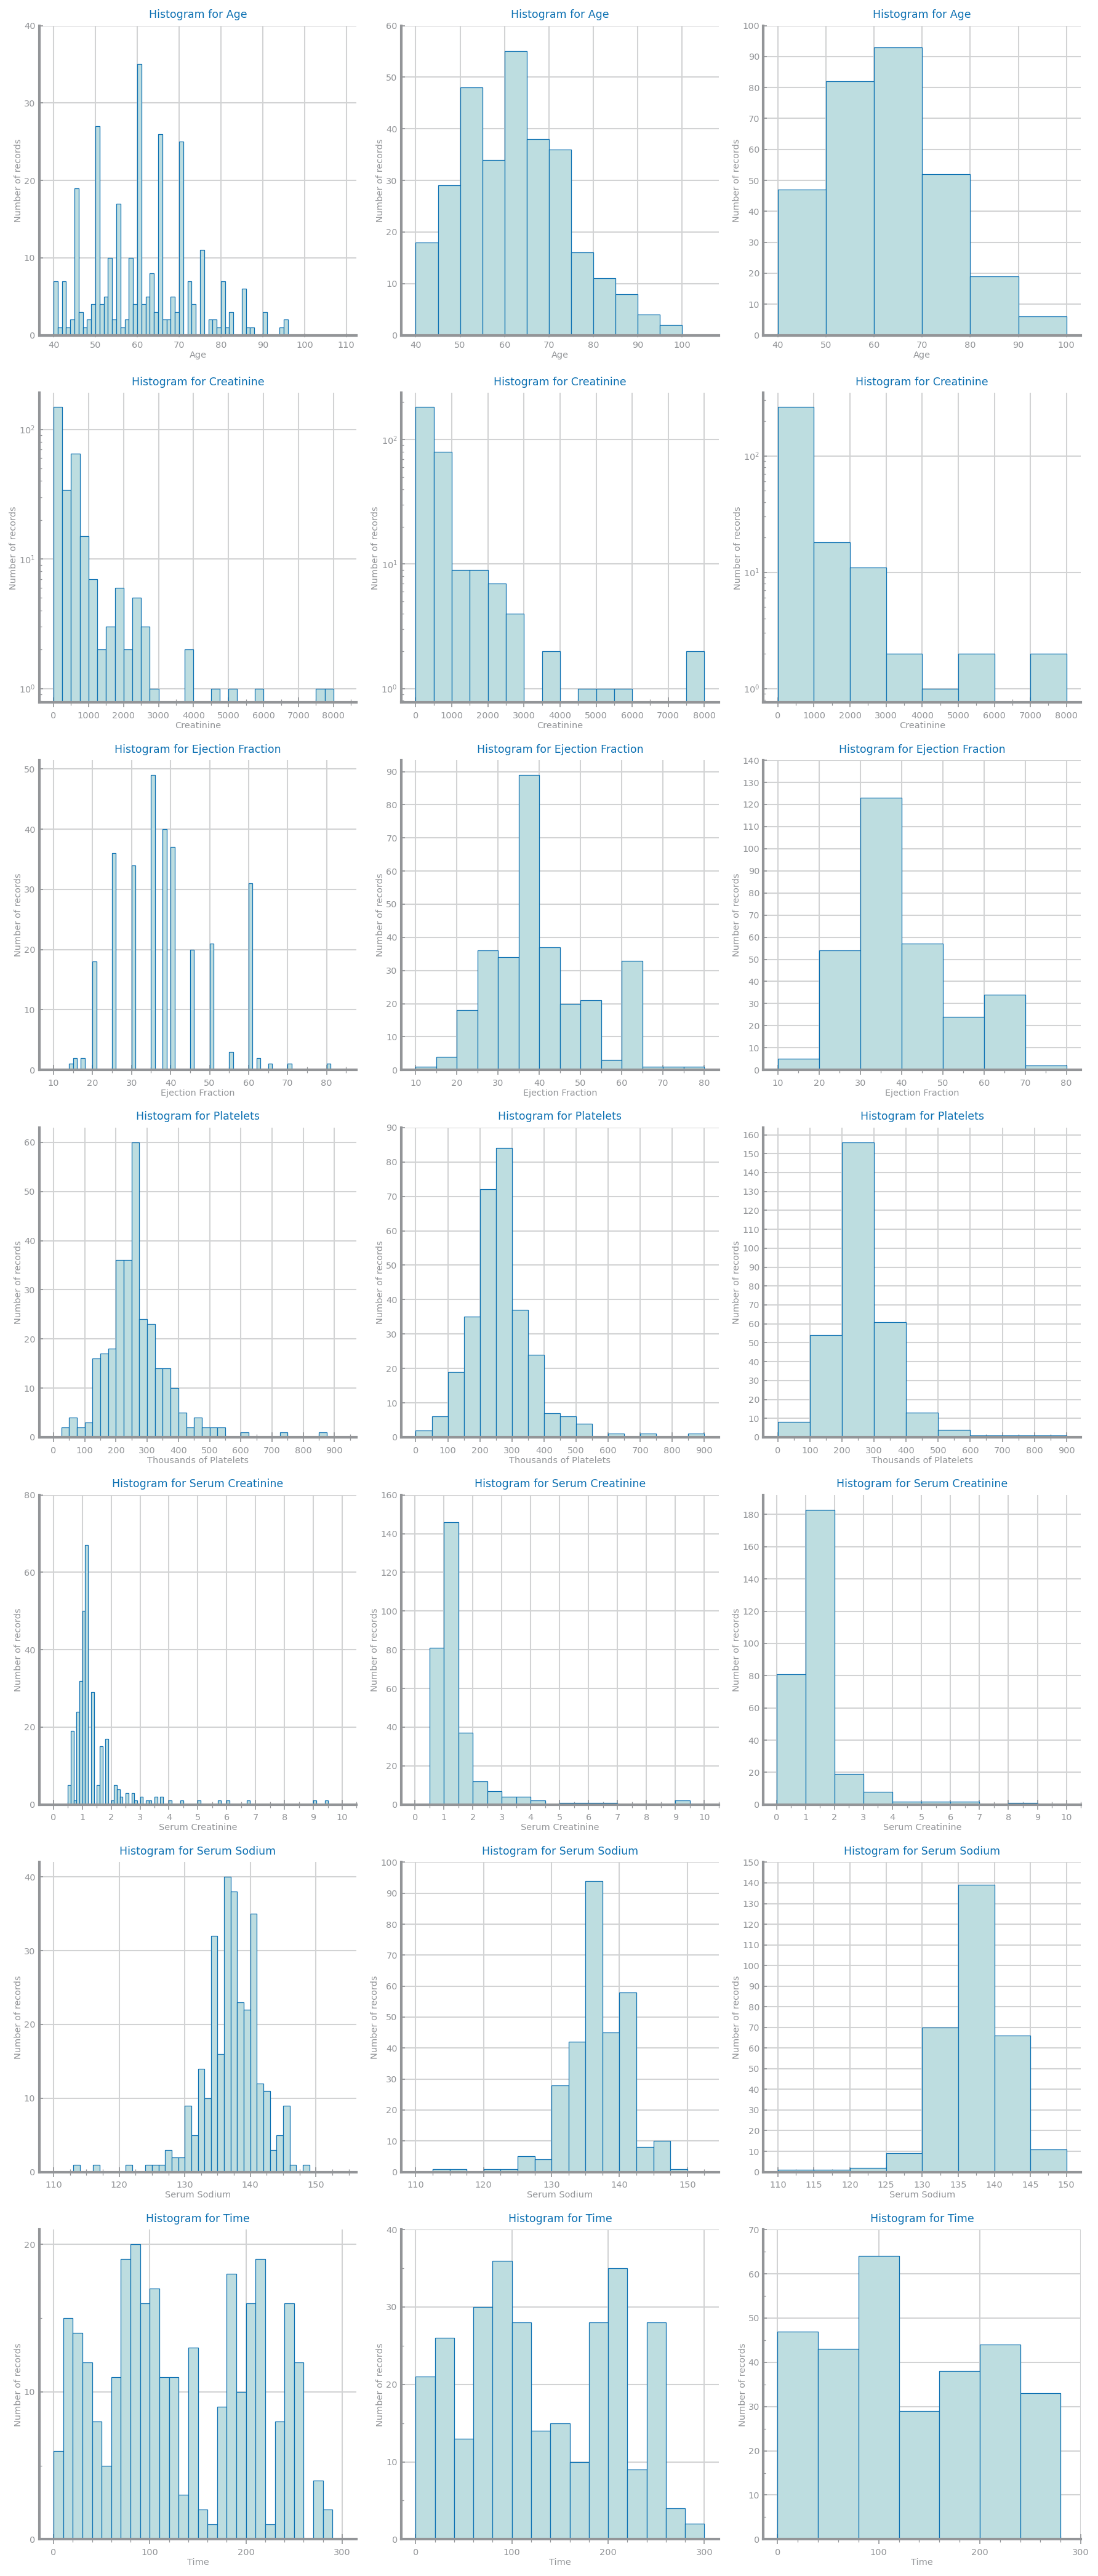

In [9]:
variables = data.select_dtypes(include=['float64','int64']).columns
#rows, cols = ds.choose_grid(len(variables))
rows, cols = variables.size, 3
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))

### Age
i = 0
bins_step = (1, 5, 10)
max_y = (50, 65, 105)
for j in range(3):
    axs[i,j].hist(data['age'].values, range=[40, 100], bins=np.arange(40, 110, bins_step[j]), edgecolor=cfg.LINE_COLOR, linewidth=0.6)
    # axs[i,j].set_ylim(0, 100)
    axs[i,j].set_yticks(np.arange(0, max_y[j], 10))
    axs[i,j].set_title('Histogram for Age')
    axs[i,j].set_xlabel('Age')
    axs[i,j].set_ylabel('Number of records')

### Creatinine Phosphokinase
i = i + 1
bins_step = (250, 500, 1000)
for j in range(3):
    axs[i,j].hist(data['creatinine_phosphokinase'].values, bins=np.arange(0, 8500, bins_step[j]), edgecolor=cfg.LINE_COLOR, linewidth=0.6)
    # axs[i,j].set_ylim(0, 100)
    # axs[i,j].grid(b=True, which='minor', axis='y', color="#f0efeb")
    axs[i,j].set_yscale("log")
    axs[i,j].xaxis.set_minor_locator(MultipleLocator(500))
    axs[i,j].xaxis.set_major_locator(MultipleLocator(1000))
    axs[i,j].tick_params(which='minor', length=5, axis='x')
    axs[i,j].tick_params(which='major', length=8, axis='x')
    axs[i,j].set_title('Histogram for Creatinine')
    axs[i,j].set_xlabel('Creatinine')
    axs[i,j].set_ylabel('Number of records')

### Ejection Fraction
i = i + 1
bins_step = (1, 5, 10)
max_y = (55, 95, 145)
for j in range(3):
    axs[i,j].hist(data['ejection_fraction'].values, bins=np.arange(10, 85, bins_step[j]), edgecolor=cfg.LINE_COLOR, linewidth=0.6)
    axs[i,j].xaxis.set_minor_locator(MultipleLocator(5))
    axs[i,j].set_yticks(np.arange(0, max_y[j], 10))
    axs[i,j].tick_params(which='minor', length=5, axis='x')
    axs[i,j].tick_params(which='major', length=8, axis='x')
    axs[i,j].set_title('Histogram for Ejection Fraction')
    axs[i,j].set_xlabel('Ejection Fraction')
    axs[i,j].set_ylabel('Number of records')

### Platelets
i = i + 1
bins_step =  (25000, 50000, 100000)
max_y = (65, 95, 165)
for j in range(3):
    axs[i,j].hist(data['platelets'].values, bins=np.arange(0, 950000, bins_step[j]), edgecolor=cfg.LINE_COLOR, linewidth=0.6)
    axs[i,j].set_yticks(np.arange(0, max_y[j], 10))
    axs[i,j].get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x/1000), ',')))
    axs[i,j].xaxis.set_minor_locator(MultipleLocator(50000))
    axs[i,j].xaxis.set_major_locator(MultipleLocator(100000))
    axs[i,j].tick_params(which='minor', length=5, axis='x')
    axs[i,j].tick_params(which='major', length=8, axis='x')
    axs[i,j].set_title('Histogram for Platelets')
    axs[i,j].set_xlabel('Thousands of Platelets')
    axs[i,j].set_ylabel('Number of records')

### serum_creatinine
i = i + 1
bins_step = (0.1, 0.5, 1)
max_y = (85, 165, 195)
for j in range(3):
    axs[i,j].hist(data['serum_creatinine'].values, bins=np.arange(0, 10, bins_step[j]), edgecolor=cfg.LINE_COLOR, linewidth=0.6)
    axs[i,j].set_yticks(np.arange(0, max_y[j], 20))
    axs[i,j].set_xticks(np.arange(0, 11, 0.5))
    # axs[i,j].set_xticks(np.arange(0, 305, 100))
    # axs[i,j].get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x/1000), ',')))
    axs[i,j].xaxis.set_major_locator(MultipleLocator(1))
    axs[i,j].xaxis.set_minor_locator(MultipleLocator(0.5))
    axs[i,j].tick_params(which='minor', length=5, axis='x')
    axs[i,j].tick_params(which='major', length=8, axis='x')
    axs[i,j].set_title('Histogram for Serum Creatinine')
    axs[i,j].set_xlabel('Serum Creatinine')
    axs[i,j].set_ylabel('Number of records')

### serum_sodium
i = i + 1
bins_step = (1, 2.5, 5)
max_y = (45, 105, 155)
for j in range(3):
    axs[i,j].hist(data['serum_sodium'].values, bins=np.arange(110, 155, bins_step[j]), edgecolor=cfg.LINE_COLOR, linewidth=0.6)
    axs[i,j].set_yticks(np.arange(0, max_y[j], 10))
    # axs[i,j].get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x/1000), ',')))
    axs[i,j].xaxis.set_minor_locator(MultipleLocator(2.5))
    axs[i,j].tick_params(which='minor', length=5, axis='x')
    axs[i,j].tick_params(which='major', length=8, axis='x')
    axs[i,j].set_title('Histogram for Serum Sodium')
    axs[i,j].set_xlabel('Serum Sodium')
    axs[i,j].set_ylabel('Number of records')

### time
i = i + 1
bins_step = (10, 20, 40)
max_y = (25, 45, 75)
for j in range(3):
    axs[i,j].hist(data['time'].values, bins=np.arange(0, 305, bins_step[j]), edgecolor=cfg.LINE_COLOR, linewidth=0.6)
    axs[i,j].set_xticks(np.arange(0, 305, 100))
    axs[i,j].set_yticks(np.arange(0, max_y[j], 10))
    # axs[i,j].get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x/1000), ',')))
    axs[i,j].xaxis.set_minor_locator(MultipleLocator(20))
    axs[i,j].yaxis.set_minor_locator(MultipleLocator(5))
    axs[i,j].tick_params(which='minor', length=5, axis='x')
    axs[i,j].tick_params(which='major', length=8, axis='x')
    axs[i,j].set_title('Histogram for Time')
    axs[i,j].set_xlabel('Time')
    axs[i,j].set_ylabel('Number of records')

plt.tight_layout()



# Distribution

# Toxicity Dataset

In [10]:
data2 = pd.read_csv('data/qsar_oral_toxicity.csv', sep=';', header=None)

## Dimensionality

In [11]:
data2

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,negative
8988,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,negative
8989,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,negative
8990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


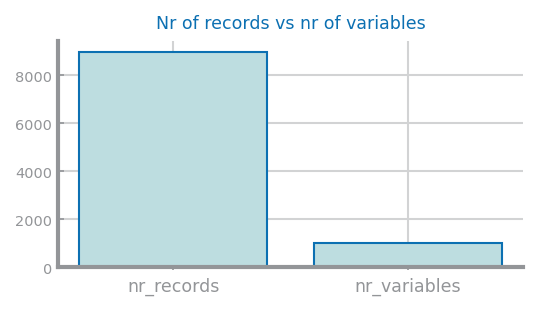

In [12]:
plt.figure(figsize=(4,2))
values = { 'nr_records': data2.shape[0], 'nr_variables': data2.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr of variables')

In [13]:
data2.dtypes

0        int64
1        int64
2        int64
3        int64
4        int64
         ...  
1020     int64
1021     int64
1022     int64
1023     int64
1024    object
Length: 1025, dtype: object

In [14]:
## Should we? YES
for c in data2.columns[:-1]:
    data2[c] = data2[c].astype('bool')
data2[data2.columns[-1]] = data2[data2.columns[-1]].astype('category')
data2.rename(columns={1024: 'toxic'}, inplace=True)
data2.dtypes

0            bool
1            bool
2            bool
3            bool
4            bool
           ...   
1020         bool
1021         bool
1022         bool
1023         bool
toxic    category
Length: 1025, dtype: object

(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 600x450 with 0 Axes>

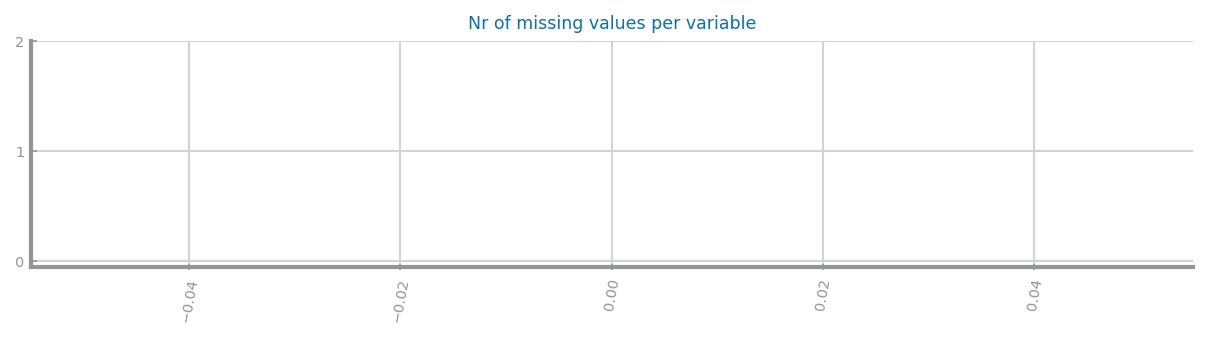

In [15]:
plt.figure()
mv = {str(var): data2[var].isna().sum() for var in data2 if data2[var].isna().sum() > 0}
plt.figure(figsize=(10, 2))
plt.bar(mv.keys(), mv.values(), edgecolor=cfg.LINE_COLOR, color=cfg.FILL_COLOR)
plt.title('Nr of missing values per variable')
plt.yticks([0, 1, 2])
plt.xticks(rotation=80)

## Granularity

## Distribution